In [ ]:
! pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 659.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=ecdcaccb4ad55487f260803c0144c889b073fdad41d0d404eb866d37b6bd6db8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2 #модуль для работы с морфологией в питоне
import re

import warnings
warnings.filterwarnings('ignore')

##Основные этапы предобработки текстов

##Токенизация

Процесс разбиения текста на более мелкие части, такие как слова или предложения.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [ ]:
text = "Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив."

In [ ]:
text

'Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.'

In [ ]:
tokens_split = text.split()

tokens_split[:30]

['Основной',
 'курс',
 'специализации',
 '«Исследования',
 'в',
 'коммуикациях»',
 'отличается',
 'своей',
 'методологической',
 'направленностью,',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам,',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы.',
 'Задача',
 'данного',
 'курса',
 '–',
 'оснастить']

Чем такой способ разбить текст на токены кажется вам неудачным?

In [ ]:
import nltk #Библиотека для обработки естественного языка
nltk.download('punkt') #Модуль библиотеки для работы с пунктуацией
from nltk.tokenize import word_tokenize

tokens_word = word_tokenize(text)
tokens_word[:30]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Основной',
 'курс',
 'специализации',
 '«',
 'Исследования',
 'в',
 'коммуикациях',
 '»',
 'отличается',
 'своей',
 'методологической',
 'направленностью',
 ',',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам',
 ',',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы',
 '.']

In [ ]:
from nltk.tokenize import sent_tokenize

tokens_sent = sent_tokenize(text)

tokens_sent

['Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы.',
 'Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов.',
 'В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.']

##Предобработка текста

In [ ]:
text

'Основной курс специализации «Исследования в коммуикациях» отличается своей методологической направленностью, что является его уникальной чертой по отношению к другим курсам, реализованным в рамках образовательной программы. Задача данного курса – оснастить студентов уникальным инстру***ментарием для работы с эмпирическими данными, агрегации полученных результатов и создания уникальных коммуникационных продуктов. В результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения, основываясь на креативе, подкрепленном результатами исследования на эмпирических материалах, что делает такие решения более точными и конкурентными среди прочих альтернатив.'

Давайте уберем из текста ссылки и посторонние символы. Чтобы это сделать, нужны регулярные выражения -- формальный язык, который используется для поиска и замены текста.

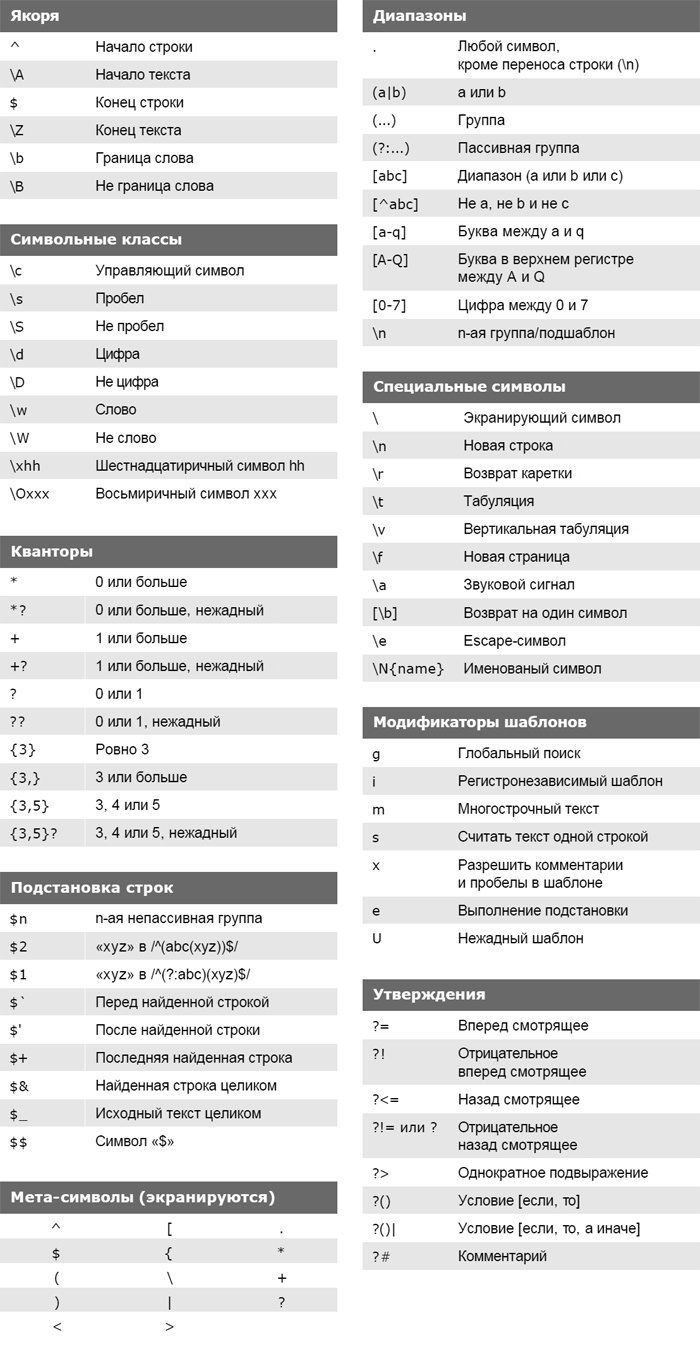

In [ ]:
text = re.sub('https?://[^,\s]+,?', ' ', text)
text = re.sub('[^a-zа-я]+', ' ', text.lower())

text

'основной курс специализации исследования в коммуикациях отличается своей методологической направленностью что является его уникальной чертой по отношению к другим курсам реализованным в рамках образовательной программы задача данного курса оснастить студентов уникальным инстру ментарием для работы с эмпирическими данными агрегации полученных результатов и создания уникальных коммуникационных продуктов в результате освоения дисциплины студенты смогут формулировать инсайты и предлагать коммуникационные решения основываясь на креативе подкрепленном результатами исследования на эмпирических материалах что делает такие решения более точными и конкурентными среди прочих альтернатив '

In [ ]:
tokens = text.split()
tokens[:30]

['основной',
 'курс',
 'специализации',
 'исследования',
 'в',
 'коммуикациях',
 'отличается',
 'своей',
 'методологической',
 'направленностью',
 'что',
 'является',
 'его',
 'уникальной',
 'чертой',
 'по',
 'отношению',
 'к',
 'другим',
 'курсам',
 'реализованным',
 'в',
 'рамках',
 'образовательной',
 'программы',
 'задача',
 'данного',
 'курса',
 'оснастить',
 'студентов']

### Немного практики - регулярки

Вопросы:

*   Чем отличается результат токенизации предобработанного текста от результата токенизации с помощью NLTK?
*   Попробуйте придумать задачу, для работы над которой подойдёт каждый из способов токенизации.


Задача: Напишите регулярное выражение для нахождения всех слов в тексте, которые начинаются с заглавной буквы.


In [ ]:
text = ' Сегодня Маша ходила в Магазин и купила Молоко.'
# ВАШ КОД
# Ожидаемый результат:
# ['Сегодня', 'Маша', 'Магазин', 'Молоко']

##Стемминг или лемматизация

Стемминг — нахождение основы слова.

Лемматизация — преобразование слова в словарный вид.



In [ ]:
# Лемматизация

from pymorphy2 import MorphAnalyzer
analyzer = MorphAnalyzer()

In [ ]:
analyzer.parse('коровы')

[Parse(word='коровы', tag=OpencorporaTag('NOUN,anim,femn sing,gent'), normal_form='корова', score=0.5, methods_stack=((DictionaryAnalyzer(), 'коровы', 53, 1),)),
 Parse(word='коровы', tag=OpencorporaTag('NOUN,anim,femn plur,nomn'), normal_form='корова', score=0.5, methods_stack=((DictionaryAnalyzer(), 'коровы', 53, 7),))]

In [ ]:
norm_form = analyzer.parse('коровы')[0].normal_form
norm_form

'корова'

In [ ]:
analyzer.parse('существует')

[Parse(word='существует', tag=OpencorporaTag('VERB,impf,intr sing,3per,pres,indc'), normal_form='существовать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'существует', 177, 5),))]

In [ ]:
ex = ['машина', 'машине', 'машину', 'машиной']

for i in ex:
    print(analyzer.parse(i)[0].normal_form)

машина
машина
машина
машина


In [ ]:
from nltk.stem import PorterStemmer


ps = PorterStemmer()

words = ["game", "gaming", "gamed", "games", "compacted"]

stemmed_words = []
for word in words:
    stemmed_words.append(ps.stem(word))

print(stemmed_words)

['game', 'game', 'game', 'game', 'compact']


### Немного практики
1) лемматизация

Преобразуйте слово в словарный вид с использованием MorphAnalyzer

In [ ]:
word = 'бабочек'
# ВАШ КОД
# Ожидаемый результат:
# бабочка

2) стемминг

In [ ]:
word = 'going'
# ВАШ КОД
# Ожидаемый результат:
# go

'go'

##Стоп слова



*   Самые частотные слова в конкретном языке
*   Мешают получить данные о частотных словах в конкретном тексте
*  Их нужно удалять



In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('russian')
nltk_stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(len(nltk_stopwords))
nltk_stopwords[:30]

151


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне']

In [ ]:
#Создадим список лемм

lemmas = []

for i in tokens:
    norm_form = analyzer.parse(i)[0].normal_form
    lemmas.append(norm_form)

In [ ]:
lemmas[:10]

['основной',
 'курс',
 'специализация',
 'исследование',
 'в',
 'коммуикация',
 'отличаться',
 'свой',
 'методологический',
 'направленность']

In [ ]:
print('Токенов до:', len(lemmas))

lemmas_filtered = []

for i in lemmas:
    if i not in nltk_stopwords:
        lemmas_filtered.append(i)

lemmas = lemmas_filtered

print('Токенов после:', len(lemmas_filtered))

Токенов до: 78
Токенов после: 60


In [ ]:
lemmas[:10]

['основной',
 'курс',
 'специализация',
 'исследование',
 'коммуикация',
 'отличаться',
 'свой',
 'методологический',
 'направленность',
 'являться']

In [ ]:
from nltk import FreqDist #Функция, создающая частотный словарь

print('Популярные униграммы: ', FreqDist(lemmas).most_common(4))

Популярные униграммы:  [('курс', 3), ('уникальный', 3), ('результат', 3), ('исследование', 2)]


FreqDist - это мощный инструмент в NLTK для анализа частоты появления элементов в тексте

- позволяет легко подсчитать частоту каждого элемента в тексте, будь то слово, символ, токен или другой тип элемента

- создает распределение частот, которое можно использовать для анализа и визуализации результатов

- позволяет найти элемент с максимальной частотой, что может быть полезно для определения наиболее важных слов или понятий в тексте

- Визуализация результатов

0.05


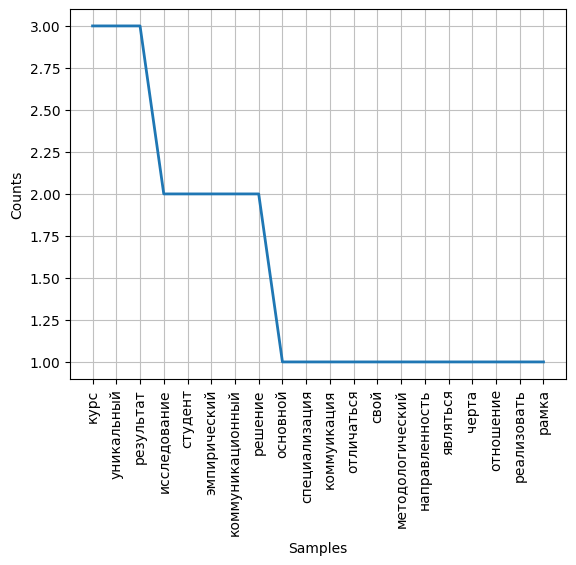

In [ ]:
import matplotlib.pyplot as plt

fdist = FreqDist(lemmas)
print(fdist.freq("курс"))  # Output: частота слова "курс"

fdist.plot(20, cumulative=False)  #  20 наиболее частотных
plt.show()

##Напишем функцию для препроцессинга текста

In [ ]:
import re
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

# инициализируем
analyzer = MorphAnalyzer()

# добавляем английские и русские стоп-слова
nltk_stopwords = set(stopwords.words('russian'))
nltk_stopwords_eng = set(stopwords.words('english'))
stop_list_full = nltk_stopwords | nltk_stopwords_eng

def my_preproc(text):
    return_list = []
    buffer_vocab = {}

    # для удаления ссылок
    text = re.sub(r'https?://\S+', ' ', text)
    # для нижнего регистра
    text = re.sub(r'[^a-zа-я]+', ' ', text.lower())

    for word in text.split():
        if len(word) <= 1:
            continue

        if word in buffer_vocab:
            return_list.append(buffer_vocab[word])
        else:
            norm_form = analyzer.parse(word)[0].normal_form
            if norm_form not in stop_list_full:
                buffer_vocab[word] = norm_form
                return_list.append(norm_form)

    return return_list

In [ ]:
my_preproc(text)

['текст', 'остаться', 'частично']